In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load your cleaned data
df = pd.read_csv('../data/cleaned_qa_data.csv')  # Or use 'simulated_qa_data.csv' if not saved earlier

df.head()  # Verify it's loaded


,Client_Name,Industry,Country,Service_Used,Project_Duration_Days,Project_Cost_INR,Revenue_Generated_INR,Is_Renewed,Team_Size,Feedback_Score,Project_Month,Profit_INR,ROI,Project_Size,Feedback_Level,Renewed_Flag,Client_Success_Score
0,Client_164,Retail,USA,API Testing,322,1088625,613320,Yes,5,6,Aug,-475305,-0.436610,Long-term,Low,1,0.305356
1,Client_29,Healthcare,Singapore,Cloud Testing,139,1918864,553728,Yes,5,4,Aug,-1365136,-0.711429,Mid-term,Low,1,0.135428
2,Client_7,Banking,India,Mobile Testing,143,1110131,2344462,No,12,6,Feb,1234331,1.111879,Mid-term,Low,0,0.624751
3,Client_190,Retail,UAE,Mobile Testing,361,457704,2913589,No,6,7,Feb,2455885,5.365662,Long-term,Medium,0,2.356265
4,Client_71,Healthcare,Singapore,Performance Testing,145,560039,429675,Yes,13,8,Sep,-130364,-0.232777,Mid-term,Medium,1,0.446889


In [3]:
df_ml = df.copy()
cat_cols = ['Country', 'Industry', 'Service_Used', 'Project_Size', 'Feedback_Level']

le = LabelEncoder()
for col in cat_cols:
    df_ml[col] = le.fit_transform(df_ml[col])

In [4]:
X = df_ml[[
    'Country', 'Industry', 'Service_Used',
    'Project_Cost_INR', 'Revenue_Generated_INR',
    'Project_Duration_Days', 'Feedback_Score',
    'Profit_INR', 'ROI', 'Client_Success_Score',
    'Team_Size'
]]

y = df_ml['Renewed_Flag']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.895

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.62      0.75        52
           1       0.88      0.99      0.93       148

    accuracy                           0.90       200
   macro avg       0.92      0.80      0.84       200
weighted avg       0.90      0.90      0.89       200


Confusion Matrix:
 [[ 32  20]
 [  1 147]]


C:\Users\gates\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


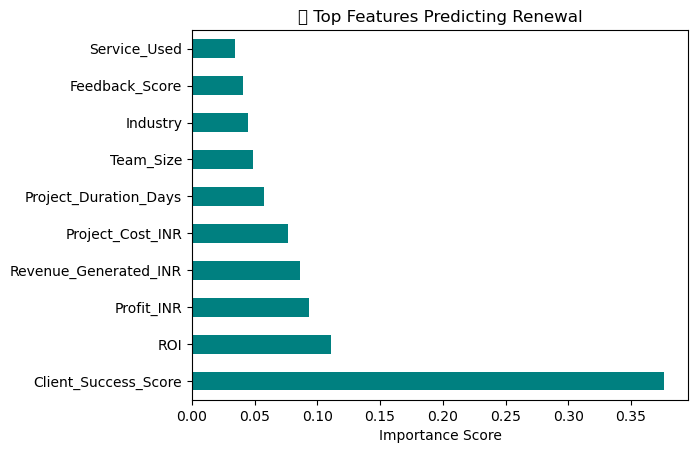

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh', color='teal')
plt.title("🎯 Top Features Predicting Renewal")
plt.xlabel("Importance Score")
plt.show()

In [9]:
import joblib
joblib.dump(model, 'C:\\Users\\gates\\Desktop\\data_analyst_mini_project\\enterprise_qa_strategy_simulation\\model\\churn_model.pkl')

['C:\\Users\\gates\\Desktop\\data_analyst_mini_project\\enterprise_qa_strategy_simulation\\model\\churn_model.pkl']